## Tutorial 4: Machine Learning and Programming in Python

This tutorial covers tree algorithms. Firstly, we start with a Regression Trees and will than focus on Tree based methods for classification.




#### Dear Students, please prepare for the upcoming tutorial. Improving your coding skills involves a trial and error approach. Try to familiarize yourself with Python and the underlying algorithms. Your codes don't need to be perfect or identical, but you should be ready to actively participate in the upcoming discussion!

## Regression Trees

 The following regression tree uses the boston housing data to predict the average housing value in boston. The tree grows from top to bottom. The tree has its root at the top and splits into internal nodes. Each internal split is denoted as an internal node, and the final regression results are denoted as a terminal node. The splitting criteria is the top-down, greedy approach also known as recursive binary splitting.The approach is top-down because it begins at the top of the tree (at which point all observations belong to a single region) and then successively splits the predictor space; each split is indicated via two new branches further down on the tree. It is greedy because at each step of the tree-building process, the best split is made at that particular step, rather than looking ahead and picking a split that will lead to a better tree in some future step.

 ### Variable Description
     CRIM - per capita crime rate by town
    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS - proportion of non-retail business acres per town.
    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX - nitric oxides concentration (parts per 10 million)
    RM - average number of rooms per dwelling
    AGE - proportion of owner-occupied units built prior to 1940
    DIS - weighted distances to five Boston employment centres
    RAD - index of accessibility to radial highways
    TAX - full-value property-tax rate per 10,000 US Dollars
    PTRATIO - pupil-teacher ratio by town
    B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    LSTAT - % lower status of the population
    MEDV - Median value of owner-occupied homes in $1000's


Mean Squared Error (train): 15.901624015343652
Mean Squared Error (test): 13.491273032995434


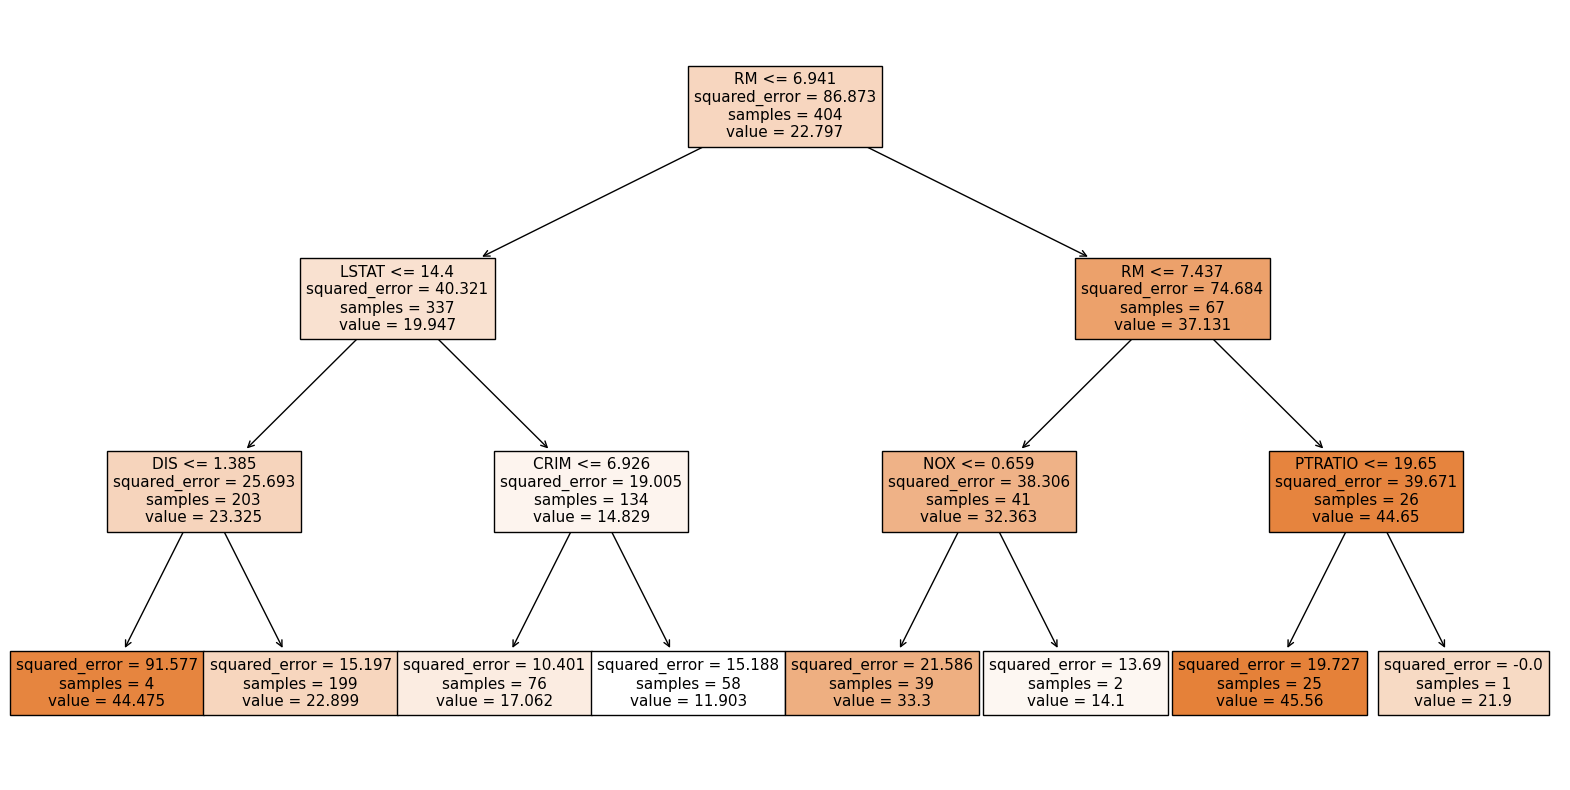

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston_housing = pd.read_csv('boston_house_prices.csv', skiprows=1, names=column_names)

# Delete first row (variable descriptions)
boston_housing = boston_housing.drop(index=0)

# Convert all columns to numeric
boston_housing = boston_housing.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
boston_housing = boston_housing.dropna()

# Split data into features (X) and target (y)
X = boston_housing.drop(columns=['MEDV'])
y = boston_housing['MEDV']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a regression Tree model
Reg_Tree = DecisionTreeRegressor(criterion = 'squared_error', splitter = 'best', max_depth = 3, random_state = 64535)
Reg_Tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = Reg_Tree.predict(X_test)

# Make predictions on the train set
y_pred_train = Reg_Tree.predict(X_train)

# Evaluate the model on train set
mse_train = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error (train):", mse_train)

# Evaluate the model on test set
mse_test = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (test):", mse_test)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(Reg_Tree, filled=True, feature_names=X.columns)
plt.show()



### Interpretation

The root:

   - "RM <= 6.941" serves as the splitting criterion. Observations with an average number of rooms per dwelling less than or equal to 6.941 are assigned to the left branch, while those with a larger value are assigned to the right branch.
   - The squared error (MSE) of 86.873 represents the average squared error from the median housing value in the node, which encompasses the entire training dataset.
   - "Samples" indicates the number of observations in that region.
   - "Value" provides the predicted median housing value derived from the data. Since the Mean Squared Error (MSE) was chosen, this value corresponds to the average of the median housing value in that region.

Internal nodes (or internal splits):

   - "Value" retains the same interpretation as previously described.
   - The difference lies in the fact that the training data is already divided into subsets based on previous splits.
   - For instance, consider "CRIM <= 6.926". The data at this internal node comprises the training data where "RM <= 6.941" and "LSTAT > 14.4".

Terminal nodes (or leaves):

   - These represent the final regression results obtained from the fully fitted tree for all observations falling within each respective terminal node or leaf.


Mean Squared Error (MSE) on the training and test set:

   - The MSE on the training set is 15.901624015343652.
   - The MSE on the test set is 13.491273032995432.
   - Notably, the model demonstrates an unexpected behavior where its performance improves from the training to the test set. This outcome is atypical, as the model is typically trained on the training set and evaluated on the test set. Such improvement suggests that the model's generalization ability enhances when applied to unseen data, which can occur due to various factors such as random variations in data partitioning, the characteristics of the test data, or the model's complexity. The Mean Squared Error (MSE) on both the training and test sets does vary when adjusting the maximum depth of the decision tree or altering the proportion of the training and test data.

## Classification Tree

In the following the titanic dataset is included in order to perform tree based classification methods:

    - Survived: Whether the passenger survived or not (0 = No, 1 = Yes)
    - Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
    - Name: Passenger's name
    - Sex: Passenger's sex (male or female)
    - Age: Passenger's age
    - SibSp: Number of siblings/spouses aboard the Titanic
    - Parch: Number of parents/children aboard the Titanic
    - Ticket: Ticket number
    - Fare: Passenger fare
    - Cabin: Cabin number
    - Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

### Data Preparation

In [2]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt #For the upcoming plots

# Load the dataset
titanic = pd.read_csv('Titanicdata.csv')

# Check for NaNs
print("Any NaNs before cleaning?",titanic.isna().any().any())

nan_counts = titanic.isnull().sum()

# Filter to show only columns with NaN values
columns_with_nans = nan_counts[nan_counts > 0]

# Print the columns with NaN values
print("Columns with NaN values:")
print(columns_with_nans)

# Dropping all NaNs
titanic.dropna(subset=['Age'], inplace=True)

# Drop the 'Cabin' column, as dropping 687 rows from the dataset makes it rather small
titanic.drop(columns=['Cabin'], inplace=True)

# Drop NaNs of column Embarked, as the number of NaNs is small
titanic.dropna(subset=['Embarked'], inplace=True)

print("Any NaNs after cleaning?",titanic.isna().any().any())

# Additionally, drop unnecessary columns
titanic.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)

titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})

titanic = pd.get_dummies(titanic, prefix = ['Embarked'])

# Prevent multicollinearity!
titanic.drop(columns = ['Embarked_C'], inplace = True)

titanic['Embarked_Q'] = titanic['Embarked_Q'].astype(int)

titanic['Embarked_S'] = titanic['Embarked_S'].astype(int)

from sklearn.model_selection import train_test_split

ind_var = titanic.drop('Survived', axis=1) #Drop dependent Variable

dep_var = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(ind_var, dep_var, test_size=0.3, random_state =10)


Any NaNs before cleaning? True
Columns with NaN values:
Age         177
Cabin       687
Embarked      2
dtype: int64
Any NaNs after cleaning? False


#### Task 1) Classifcation Tree

Implement a classification tree:
- Plot your classification tree and interpret the root, internal nodes, and terminal nodes using the Titanic dataset.
- Explain your choosen measure used for recursive binary splitting.
- Analyze the impact of changing the tree depth on flexibility and interpretability, using your evaluation metrics for interpretation.


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
# Fit a regression Tree model
class_tree = DecisionTreeClassifier(criterion = 'gini', splitter = 'best', max_depth = 3, random_state = 10).fit(X_train, y_train)

In [5]:
# Make predictions on the test set
y_pred = class_tree.predict(X_test)

# Make predictions on the train set
y_pred_train = class_tree.predict(X_train)

In [6]:
# Evaluate the model on train set
mse_train = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error (train):", mse_train)

# Evaluate the model on test set
mse_test = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (test):", mse_test)

Mean Squared Error (train): 0.178714859437751
Mean Squared Error (test): 0.19158878504672897


In [7]:
metrics = classification_report(y_train, y_pred_train)
metrics

'              precision    recall  f1-score   support\n\n           0       0.83      0.89      0.86       300\n           1       0.81      0.72      0.76       198\n\n    accuracy                           0.82       498\n   macro avg       0.82      0.80      0.81       498\nweighted avg       0.82      0.82      0.82       498\n'

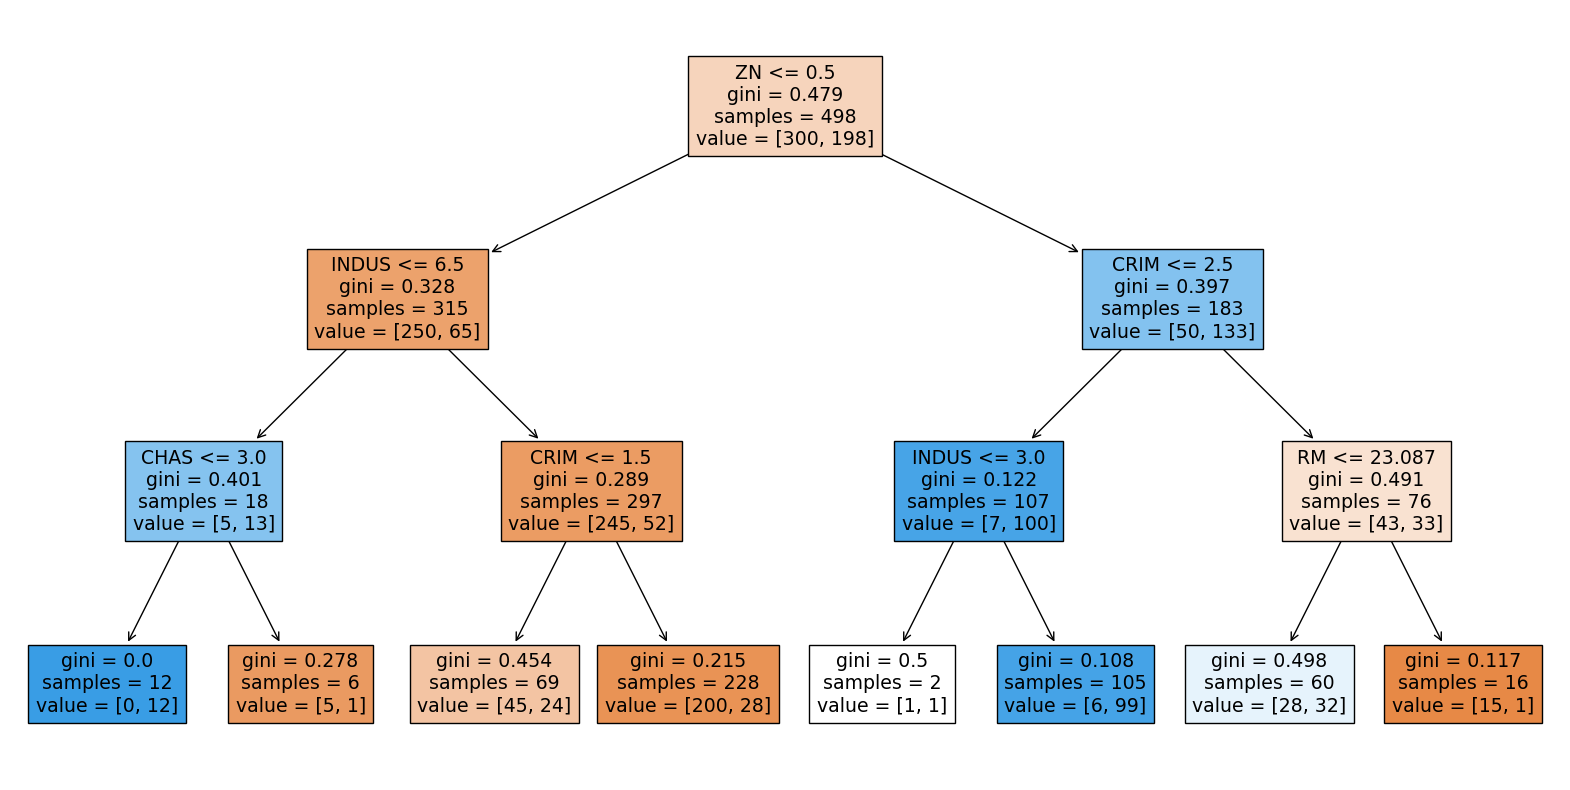

In [8]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(class_tree, filled=True, feature_names=X.columns)
plt.show()